# Data Understanding

Dataset yang digunakan adalah dataset MovieLens versi terakhir yang kecil (ml-latest-small) dari tautan berikut https://grouplens.org/datasets/movielens/. Dataset ini berisi penilaian bintang 5 dari pengguna MovieLens, layanan rekomendasi film.

Dataset ini berisi 100836 penilaian dan 3683 penanda/tag di seluruh 9742 film, dibuat oleh 610 pengguna antara 29 Maret 1996 dan 24 September 2018. Dataset ini buat pada 26 September 2018.

Langkah pertama dalam bekerja dengan kumpulan data MovieLens adalah mengunduhnya. Kita menggunakan perintah wget untuk melakukan ini. Perintah yang digunakan adalah:

In [1]:
!wget https://files.grouplens.org/datasets/movielens/ml-latest-small.zip

--2024-04-09 06:31:55--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K  --.-KB/s    in 0.1s    

2024-04-09 06:31:55 (8.17 MB/s) - ‘ml-latest-small.zip’ saved [978202/978202]



Setelah kumpulan data berhasil diunduh, langkah berikutnya adalah mengekstrak isinya. Kita menggunakan perintah unzip untuk ini:

In [2]:
!unzip /content/ml-latest-small.zip

Archive:  /content/ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


Isi Dataset
- ratings.csv: Semua penilaian terkandung di file ini, dengan skala penilaian 5 bintang dengan peningkatan setengah bintang.
- tags.csv: Semua tag terkandung dalam file ini, mewakili tag yang diterapkan pada film oleh pengguna.
- movies.csv: Informasi film terkandung dalam file ini, termasuk judul film dan genre.
- links.csv: Pengenal yang dapat digunakan untuk menghubungkan ke sumber data film lainnya terkandung dalam file ini.
- README.txt: Penjelasan dari dataset dalm file ini.

## Struktur Dasar Dataset
Untuk memulai eksplorasi dataset ini, langkah pertama adalah memuat dan meninjau struktur dasar dari setiap file (ratings, tags, movies, dan links) menggunakan pandas. Ini akan membantu kita memahami struktur data dan mempersiapkan analisis lebih lanjut.

Memuat Data: Kita akan memuat setiap file (ratings, tags, movies, links) ke dalam DataFrame pandas.

In [3]:
import pandas as pd

# Memuat setiap file ke dalam DataFrame pandas
ratings = pd.read_csv('ml-latest-small/ratings.csv')
tags = pd.read_csv('ml-latest-small/tags.csv')
movies = pd.read_csv('ml-latest-small/movies.csv')
links = pd.read_csv('ml-latest-small/links.csv')

Setelah data dimuat ke dalam DataFrame, kita dapat mulai membaca datanya dengan menggunakan metode .head() yang memberikan lima baris pertama dari setiap DataFrame

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Data film (movies.csv) berisi kolom movieId, title, dan genres. Setiap baris merepresentasikan informasi tentang sebuah film, termasuk judul dan genre-genrenya.

In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Data penilaian (ratings.csv) berisi kolom userId, movieId, rating, dan timestamp. Ini menunjukkan bahwa setiap baris merepresentasikan penilaian yang diberikan oleh pengguna terhadap film dengan skala penilaian dari 0.5 hingga 5 bintang, dicatat dengan waktu dalam format timestamp.

In [6]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


Data tag (tags.csv) berisi kolom userId, movieId, tag, dan timestamp. Setiap baris merepresentasikan tag yang diterapkan oleh pengguna terhadap film, juga dicatat dengan waktu dalam format timestamp.

In [7]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


Data link (links.csv) berisi kolom movieId, imdbId, dan tmdbId. Ini menghubungkan data ke sumber data film lain seperti IMDb atau TMDB.

# Explanatory Data Analysis

## Statistik Deskriptif dari Rating
Kita akan fokus pada file ratings.csv dan menghitung statistik dasar dari kolom rating.

In [8]:
# Menghitung statistik deskriptif dasar untuk kolom 'rating' dari DataFrame ratings
statistik_deskriptif = ratings['rating'].describe()

# Menghitung modus karena tidak termasuk dalam fungsi describe()
modus_rating = ratings['rating'].mode()[0]

# Menambahkan modus ke dalam statistik deskriptif
statistik_deskriptif['modus'] = modus_rating

statistik_deskriptif

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
modus         4.000000
Name: rating, dtype: float64

Berikut adalah statistik deskriptif dasar untuk rating dalam dataset:

- Jumlah Rating: 100836
- Rata-Rata (Mean): 3.5016
- Standar Deviasi: 1.0425
- Nilai Minimum: 0.5
- Kuartil Pertama (25%): 3.0
- Median (50%): 3.5
- Kuartil Ketiga (75%): 4.0
- Nilai Maksimum: 5.0
- Modus: 4.0

Dari data ini, kita bisa melihat bahwa rating rata-rata berada di sekitar 3.5, dengan modus rating adalah 4.0, yang menunjukkan bahwa sebagian besar pengguna cenderung memberikan rating tinggi. Distribusi rating menunjukkan bahwa pengguna MovieLens umumnya memberikan rating positif, dengan skewness ringan ke arah rating yang lebih tinggi.

## Distribusi Rating
Kita akan memvisualisasikan distribusi rating untuk mendapatkan gambaran lebih dalam tentang bagaimana rating dibagi antara nilai-nilai yang berbeda.

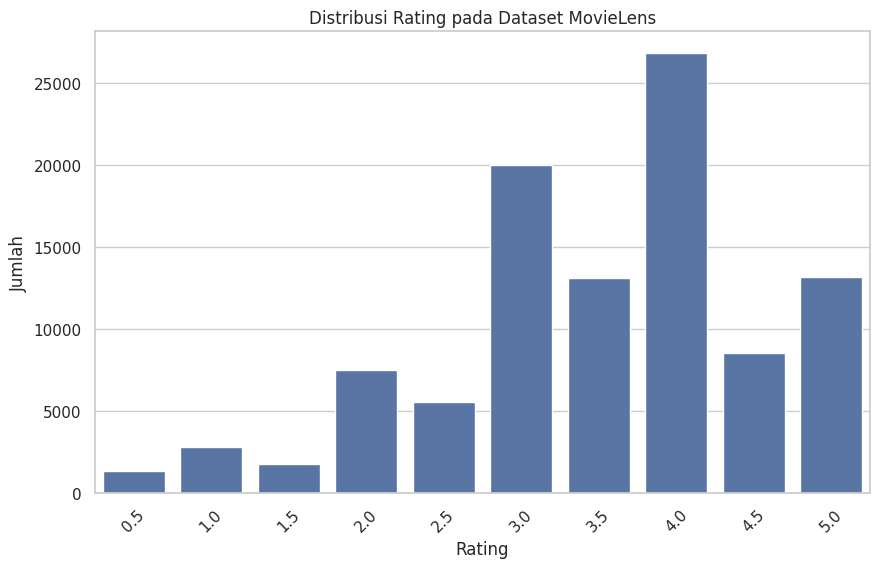

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Membuat visualisasi distribusi rating
plt.figure(figsize=(10, 6))
sns.countplot(data=ratings, x='rating')
plt.title('Distribusi Rating pada Dataset MovieLens')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()


Visualisasi di atas menunjukkan distribusi rating pada dataset MovieLens. Dari grafik, kita bisa melihat beberapa hal:

Rating dengan nilai 4.0 adalah yang paling sering diberikan, sesuai dengan nilai modus yang kita hitung sebelumnya.
Rating dengan nilai 3.0 dan 4.0 bersama-sama mendominasi distribusi, menunjukkan bahwa kebanyakan film menerima penilaian positif dari pengguna.
Distribusi rating menunjukkan kecenderungan pengguna untuk memberikan rating yang lebih tinggi, dengan jumlah rating yang lebih rendah (seperti 0.5 dan 1.0) jauh lebih sedikit dibandingkan dengan rating tinggi.

## Jumlah Rating per Pengguna
Kita akan menghitung jumlah rating yang diberikan oleh setiap pengguna untuk melihat bagaimana distribusi aktivitas penilaian di antara pengguna.

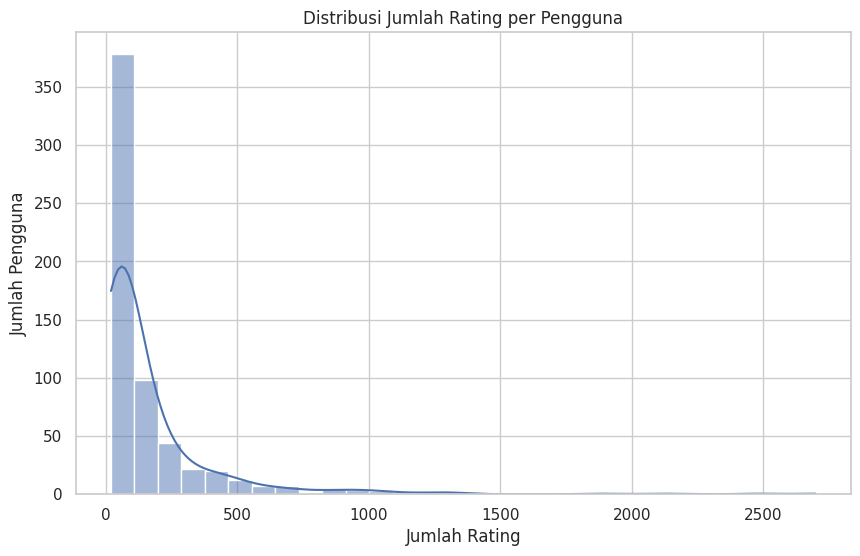

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: rating, dtype: float64

In [10]:
# Menghitung jumlah rating yang diberikan oleh setiap pengguna
jumlah_rating_per_pengguna = ratings.groupby('userId')['rating'].count()

# Membuat visualisasi distribusi jumlah rating per pengguna
plt.figure(figsize=(10, 6))
sns.histplot(jumlah_rating_per_pengguna, bins=30, kde=True)
plt.title('Distribusi Jumlah Rating per Pengguna')
plt.xlabel('Jumlah Rating')
plt.ylabel('Jumlah Pengguna')
plt.show()

# Statistik deskriptif dari jumlah rating per pengguna
statistik_jumlah_rating_per_pengguna = jumlah_rating_per_pengguna.describe()
statistik_jumlah_rating_per_pengguna


Visualisasi dan statistik deskriptif untuk jumlah rating per pengguna mengungkapkan beberapa poin penting:

- Rata-Rata Rating per Pengguna: Sekitar 165 rating, namun dengan standar deviasi yang cukup besar (269.48), menunjukkan variasi yang lebar dalam jumlah rating yang diberikan oleh pengguna.
- Minimum Rating per Pengguna: Setiap pengguna telah memberikan setidaknya 20 rating, sesuai dengan kriteria inklusi dalam dataset ini.
- Kuartil: 25% pengguna paling aktif memberikan 168 rating atau lebih, sedangkan 25% pengguna paling sedikit aktif memberikan 35 rating atau kurang.
- Maksimum: Ada pengguna yang memberikan hingga 2698 rating, menunjukkan adanya beberapa outlier yang sangat aktif dalam memberikan rating.

Distribusi jumlah rating per pengguna menunjukkan adanya variasi yang signifikan dalam tingkat partisipasi pengguna, dengan sejumlah kecil pengguna yang sangat aktif. Hal ini umum dalam banyak sistem rekomendasi di mana sebagian pengguna cenderung lebih aktif daripada yang lain.

## Jumlah Rating per Film
Kita akan menghitung jumlah rating yang diterima oleh setiap film untuk menemukan film yang paling populer.

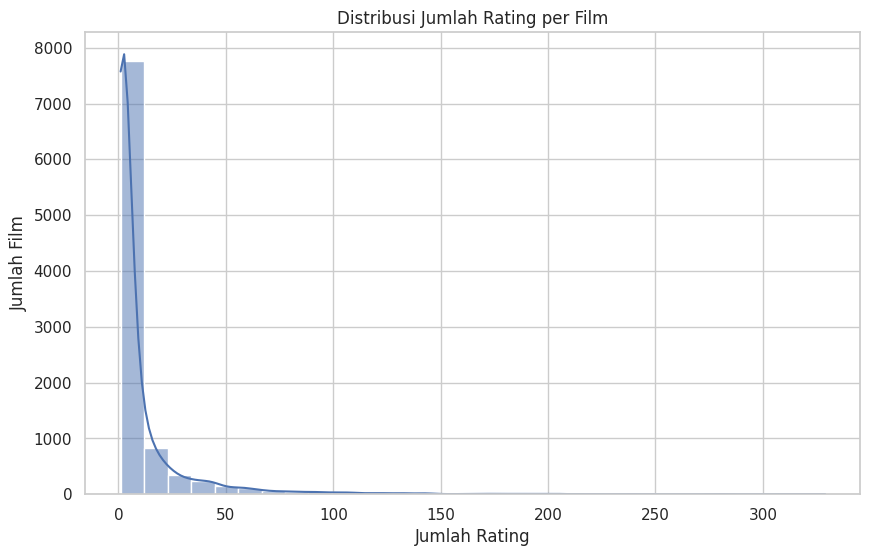

count    9724.000000
mean       10.369807
std        22.401005
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
Name: rating, dtype: float64

In [11]:
# Menghitung jumlah rating yang diterima oleh setiap film
jumlah_rating_per_film = ratings.groupby('movieId')['rating'].count()

# Membuat visualisasi distribusi jumlah rating per film
plt.figure(figsize=(10, 6))
sns.histplot(jumlah_rating_per_film, bins=30, kde=True)
plt.title('Distribusi Jumlah Rating per Film')
plt.xlabel('Jumlah Rating')
plt.ylabel('Jumlah Film')
plt.show()

# Statistik deskriptif dari jumlah rating per film
statistik_jumlah_rating_per_film = jumlah_rating_per_film.describe()
statistik_jumlah_rating_per_film


Distribusi dan statistik deskriptif jumlah rating per film mengungkapkan:

- Rata-Rata Rating per Film: Sekitar 10 rating per film, dengan variasi yang signifikan (standar deviasi ~22.4), mengindikasikan perbedaan yang besar dalam popularitas film.
- Minimum Rating per Film: Setiap film menerima setidaknya 1 rating.
- Kuartil: 75% film menerima 9 rating atau kurang, menunjukkan bahwa sebagian besar film menerima relatif sedikit perhatian.
- Maksimum: Film yang paling banyak diperbincangkan menerima 329 rating, menandakan tingkat popularitas atau ketertarikan yang tinggi dari pengguna.

Distribusi ini menunjukkan bahwa sebagian besar film hanya menerima beberapa rating, sementara sejumlah kecil film sangat populer.

## Frekuensi Genre

Analisis frekuensi genre film akan memberikan wawasan tentang genre paling populer dalam dataset ini.

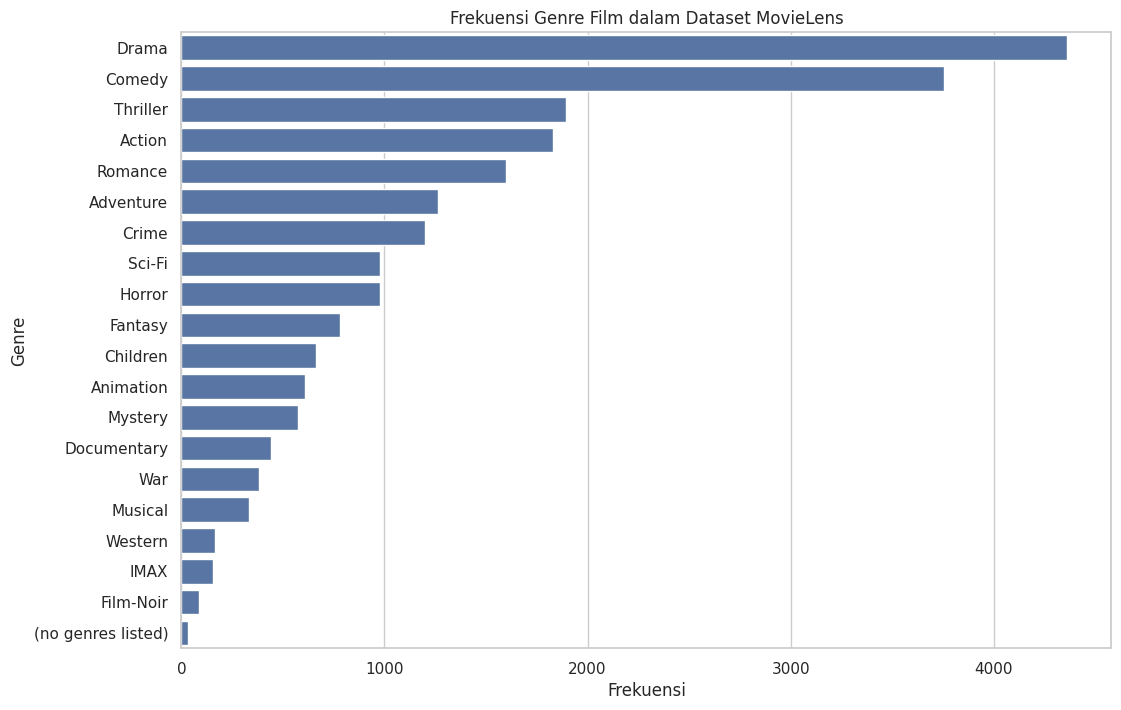

,Genre,Frekuensi
6,Drama,4361
3,Comedy,3756
9,Thriller,1894
7,Action,1828
5,Romance,1596
0,Adventure,1263
8,Crime,1199
12,Sci-Fi,980
10,Horror,978
4,Fantasy,779


In [12]:
from collections import Counter

# Menggabungkan semua genre menjadi satu list
semua_genre = sum(movies['genres'].map(lambda x: x.split('|')).tolist(), [])

# Menghitung frekuensi setiap genre
frekuensi_genre = Counter(semua_genre)

# Membuat DataFrame dari counter genre
df_frekuensi_genre = pd.DataFrame(frekuensi_genre.items(), columns=['Genre', 'Frekuensi']).sort_values(by='Frekuensi', ascending=False)

# Membuat visualisasi frekuensi genre
plt.figure(figsize=(12, 8))
sns.barplot(data=df_frekuensi_genre, x='Frekuensi', y='Genre')
plt.title('Frekuensi Genre Film dalam Dataset MovieLens')
plt.xlabel('Frekuensi')
plt.ylabel('Genre')
plt.show()

df_frekuensi_genre


Visualisasi dan data frekuensi genre film dalam dataset MovieLens menunjukkan:

- Drama adalah genre paling populer, diikuti oleh Comedy dan Thriller. Ini menunjukkan preferensi pengguna terhadap cerita yang mendalam atau menghibur.
- Genre seperti Action, Romance, dan Adventure juga cukup populer, menandakan kecenderungan umum pengguna terhadap film dengan narasi yang kuat atau elemen petualangan.
- Di sisi lain, genre seperti Film-Noir dan IMAX memiliki frekuensi yang lebih rendah, menunjukkan bahwa genre ini kurang umum atau spesifik niche dibandingkan dengan genre utama lainnya.
- Genre (no genres listed) menunjukkan bahwa ada beberapa film di dataset yang tidak memiliki genre yang terdaftar.

Frekuensi genre ini dapat membantu dalam pengembangan fitur rekomendasi, menargetkan konten promosi, atau memahami tren pasar dalam industri film.

## Film per Tahun
Kita dapat mengekstrak tahun dari judul film dan menganalisis jumlah film yang dirilis per tahun untuk melihat tren rilis film sepanjang waktu.

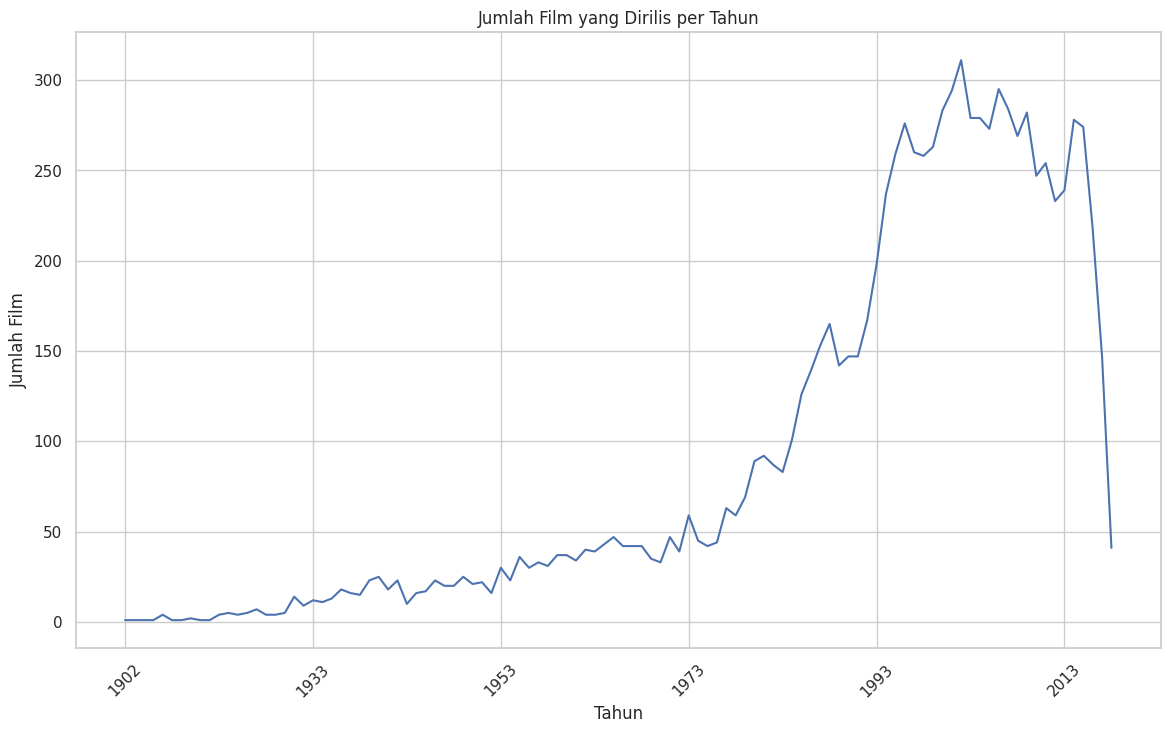

Tahun
2009    282
2010    247
2011    254
2012    233
2013    239
2014    278
2015    274
2016    218
2017    147
2018     41
dtype: int64

In [13]:
# Ekstrak tahun dari judul film
movies['Tahun'] = movies['title'].str.extract(r'\((\d{4})\)', expand=False)

# Menghitung jumlah film yang dirilis per tahun
film_per_tahun = movies.groupby('Tahun').size()

# Membuat visualisasi jumlah film per tahun
plt.figure(figsize=(14, 8))
film_per_tahun.plot(kind='line')
plt.title('Jumlah Film yang Dirilis per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Film')
plt.xticks(rotation=45)
plt.show()

# Menampilkan beberapa tahun terakhir untuk melihat tren terkini
film_per_tahun.tail(10)


Visualisasi jumlah film yang dirilis per tahun menunjukkan beberapa tren menarik:

- Terdapat peningkatan jumlah film yang dirilis setiap tahunnya hingga sekitar awal abad ke-21, dengan puncaknya terjadi di beberapa tahun tertentu.
- Setelah mencapai puncak, jumlah film yang dirilis tampaknya stabil dengan sedikit fluktuasi, namun tetap tinggi dibandingkan dengan dekade-dekade sebelumnya.
- Pada dekade terakhir, khususnya setelah 2010, jumlah film yang dirilis setiap tahun menunjukkan variasi namun cenderung stabil dengan jumlah yang cukup tinggi.
- Terdapat penurunan jumlah film yang dirilis pada tahun 2017 dan 2018, yang mungkin perubahan dalam pengumpulan data.

## Korelasi antara Genre dan Rating
Analisis hubungan antara genre film dengan rating rata-rata yang diterima bisa memberikan wawasan tentang preferensi pengguna terhadap genre tertentu.

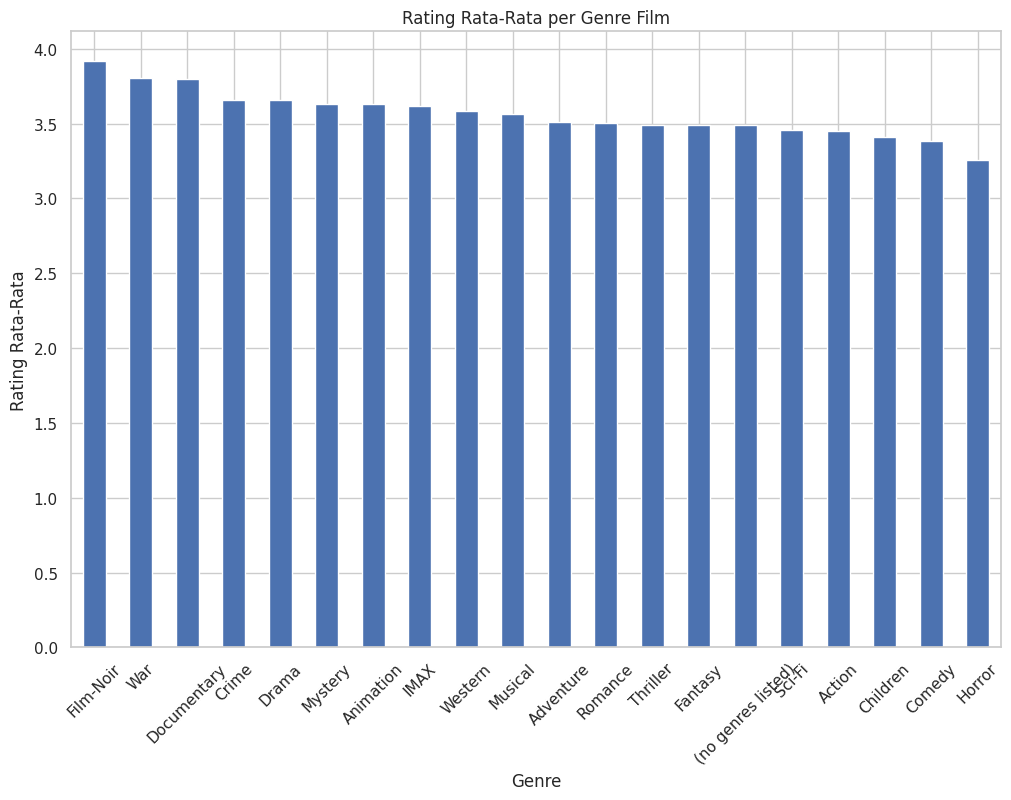

genres
Film-Noir             3.920115
War                   3.808294
Documentary           3.797785
Crime                 3.658294
Drama                 3.656184
Mystery               3.632460
Animation             3.629937
IMAX                  3.618335
Western               3.583938
Musical               3.563678
Adventure             3.508609
Romance               3.506511
Thriller              3.493706
Fantasy               3.491001
(no genres listed)    3.489362
Sci-Fi                3.455721
Action                3.447984
Children              3.412956
Comedy                3.384721
Horror                3.258195
Name: rating, dtype: float64

In [14]:
# Membuat DataFrame baru yang menggabungkan informasi rating dengan genre film
movies_with_ratings = pd.merge(movies, ratings, on='movieId')

# Menggabungkan semua genre menjadi satu list untuk setiap film
movies_with_ratings['genres'] = movies_with_ratings['genres'].map(lambda x: x.split('|'))

# Mengekspansi genre sehingga setiap genre memiliki baris sendiri untuk setiap rating
movies_with_ratings_exploded = movies_with_ratings.explode('genres')

# Menghitung rating rata-rata untuk setiap genre
rating_per_genre = movies_with_ratings_exploded.groupby('genres')['rating'].mean().sort_values(ascending=False)

# Membuat visualisasi rating rata-rata per genre
plt.figure(figsize=(12, 8))
rating_per_genre.plot(kind='bar')
plt.title('Rating Rata-Rata per Genre Film')
plt.xlabel('Genre')
plt.ylabel('Rating Rata-Rata')
plt.xticks(rotation=45)
plt.show()

rating_per_genre


Visualisasi dan analisis rating rata-rata per genre film menunjukkan:

- Film-Noir, War, dan Documentary adalah genre dengan rating rata-rata tertinggi, menunjukkan bahwa film-film dalam genre ini cenderung sangat dihargai oleh pengguna.
- Di sisi lain, Comedy dan Horror memiliki rating rata-rata yang lebih rendah dibandingkan dengan genre lain, meskipun perbedaan rating antar genre tidak terlalu signifikan.
- Drama dan Crime, yang merupakan dua genre paling populer berdasarkan frekuensi, juga memiliki rating rata-rata yang cukup tinggi, menegaskan popularitas dan apresiasi mereka di kalangan pengguna.
- Genre (no genres listed), meskipun memiliki jumlah film yang relatif rendah, menunjukkan rating rata-rata yang sebanding dengan genre populer lainnya.

## Tag Paling Populer
Kita akan mengidentifikasi tag yang paling sering digunakan oleh pengguna, memberikan gambaran tentang topik atau tema yang paling menarik bagi penonton.

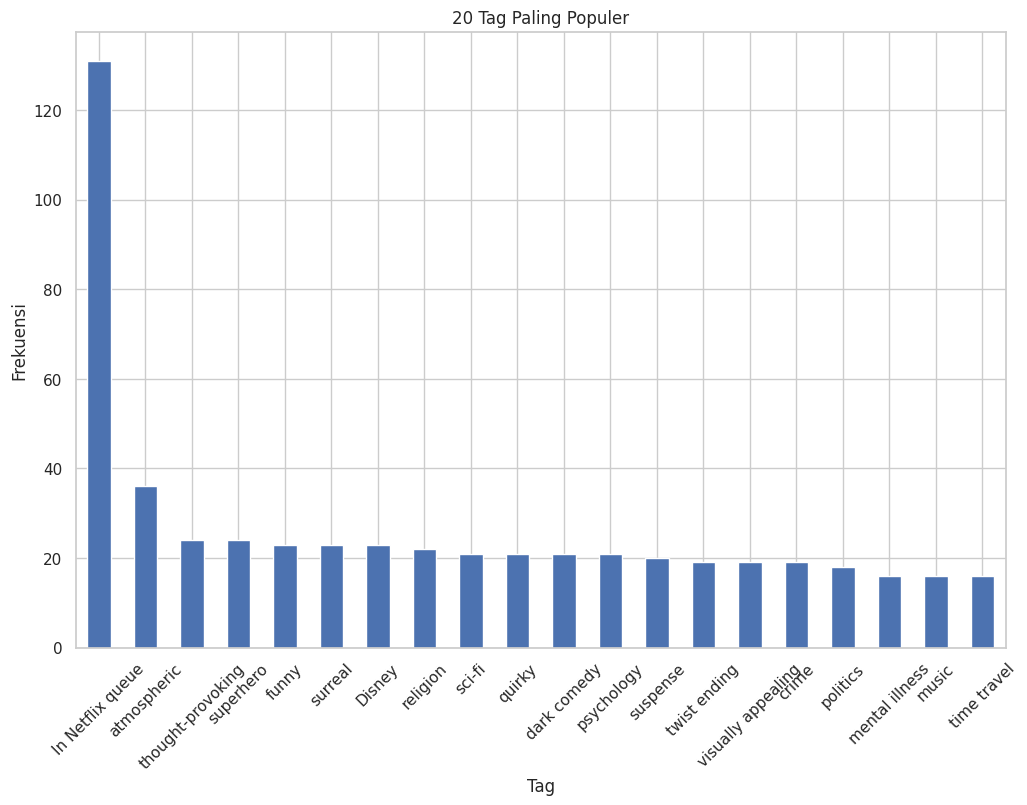

In Netflix queue      131
atmospheric            36
thought-provoking      24
superhero              24
funny                  23
surreal                23
Disney                 23
religion               22
sci-fi                 21
quirky                 21
dark comedy            21
psychology             21
suspense               20
twist ending           19
visually appealing     19
crime                  19
politics               18
mental illness         16
music                  16
time travel            16
Name: tag, dtype: int64

In [15]:
# Menghitung frekuensi setiap tag
frekuensi_tag = tags['tag'].value_counts().head(20)

# Membuat visualisasi untuk 20 tag paling populer
plt.figure(figsize=(12, 8))
frekuensi_tag.plot(kind='bar')
plt.title('20 Tag Paling Populer')
plt.xlabel('Tag')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()

frekuensi_tag


Visualisasi dan daftar 20 tag paling populer menunjukkan:

- In Netflix queue adalah tag paling populer, dengan jauh melebihi frekuensi tag lainnya. Ini menunjukkan ketertarikan pengguna untuk menandai film yang mereka ingin tonton di Netflix.
- Tag seperti atmospheric, thought-provoking, dan superhero juga populer, mencerminkan apresiasi pengguna terhadap suasana film, konten yang memicu pemikiran, dan genre superhero.
- Disney, surreal, dan funny termasuk dalam tag populer lainnya, menunjukkan ketertarikan pengguna pada film-film dengan elemen fantasi, humor, atau yang diproduksi oleh Disney.
- Tag seperti religion, sci-fi, crime, dan politics menunjukkan ketertarikan pengguna pada tema-tema spesifik dalam film.

## Korelasi antara Film dan Rating

Kita akan menghitung rating rata-rata dan jumlah rating untuk setiap film, kemudian menganalisis hubungan antara kedua variabel tersebut.

In [16]:
# Menghitung rating rata-rata dan jumlah rating per film
rating_stats_per_film = ratings.groupby('movieId').agg({
    'rating': ['mean', 'count']
}).reset_index()

# Mengganti nama kolom untuk kenyamanan
rating_stats_per_film.columns = ['movieId', 'rating_mean', 'rating_count']

# Menggabungkan data rating dengan data movie untuk mendapatkan judul film
rating_stats_with_titles = pd.merge(rating_stats_per_film, movies[['movieId', 'title']], on='movieId')

# Menampilkan beberapa contoh film
rating_stats_with_titles.sort_values(by='rating_count', ascending=False).head(10)

,movieId,rating_mean,rating_count,title
314,356,4.164134,329,Forrest Gump (1994)
277,318,4.429022,317,"Shawshank Redemption, The (1994)"
257,296,4.197068,307,Pulp Fiction (1994)
510,593,4.161290,279,"Silence of the Lambs, The (1991)"
1938,2571,4.192446,278,"Matrix, The (1999)"
224,260,4.231076,251,Star Wars: Episode IV - A New Hope (1977)
418,480,3.750000,238,Jurassic Park (1993)
97,110,4.031646,237,Braveheart (1995)
507,589,3.970982,224,Terminator 2: Judgment Day (1991)
461,527,4.225000,220,Schindler's List (1993)


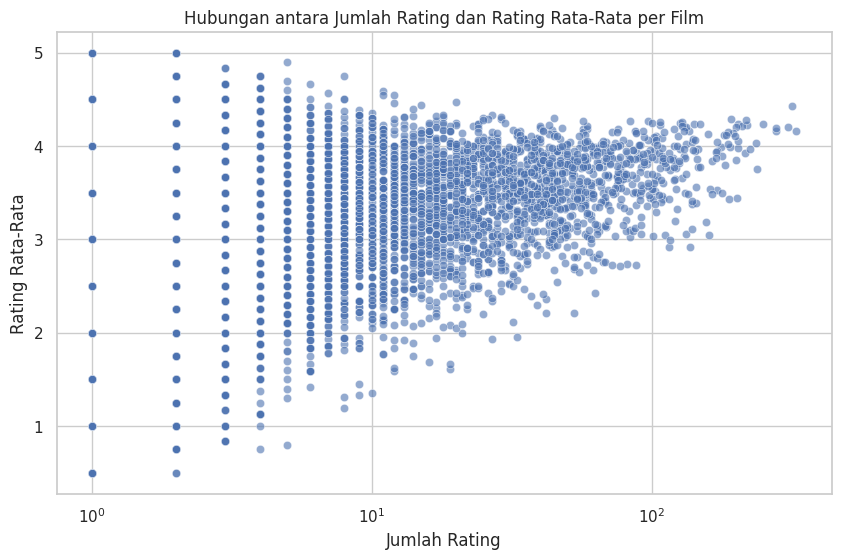

In [17]:
# Visualisasi hubungan antara jumlah rating dan rating rata-rata
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rating_stats_with_titles, x='rating_count', y='rating_mean', alpha=0.6)
plt.title('Hubungan antara Jumlah Rating dan Rating Rata-Rata per Film')
plt.xlabel('Jumlah Rating')
plt.ylabel('Rating Rata-Rata')
plt.xscale('log')  # Skala log untuk menangani distribusi yang lebar
plt.show()

Visualisasi hubungan antara jumlah rating dan rating rata-rata per film menunjukkan beberapa insight menarik:

- Distribusi: Terdapat sejumlah kecil film dengan jumlah rating yang sangat tinggi, menunjukkan popularitas yang signifikan. Kebanyakan film memiliki jumlah rating yang lebih moderat atau rendah.
- Hubungan: Tidak tampak adanya hubungan yang jelas antara jumlah rating dan rating rata-rata, yang menunjukkan bahwa film-film populer tidak selalu memiliki rating rata-rata yang lebih tinggi daripada film-film dengan jumlah rating yang lebih sedikit. Ini menunjukkan bahwa kualitas persepsi (seperti diukur oleh rating rata-rata) dan popularitas (jumlah rating) dapat berjalan independen satu sama lain.
- Film Populer: Beberapa film dengan jumlah rating tertinggi adalah Forrest Gump (1994), Shawshank Redemption, The (1994), dan Pulp Fiction (1994), semua mendapatkan rating rata-rata yang cukup tinggi.

## Distribusi Rating Sepanjang Waktu
Analisis distribusi rating sepanjang waktu bisa memberikan wawasan tentang tren penilaian film oleh pengguna, seperti apakah pengguna cenderung memberikan rating lebih tinggi atau lebih rendah di waktu tertentu.

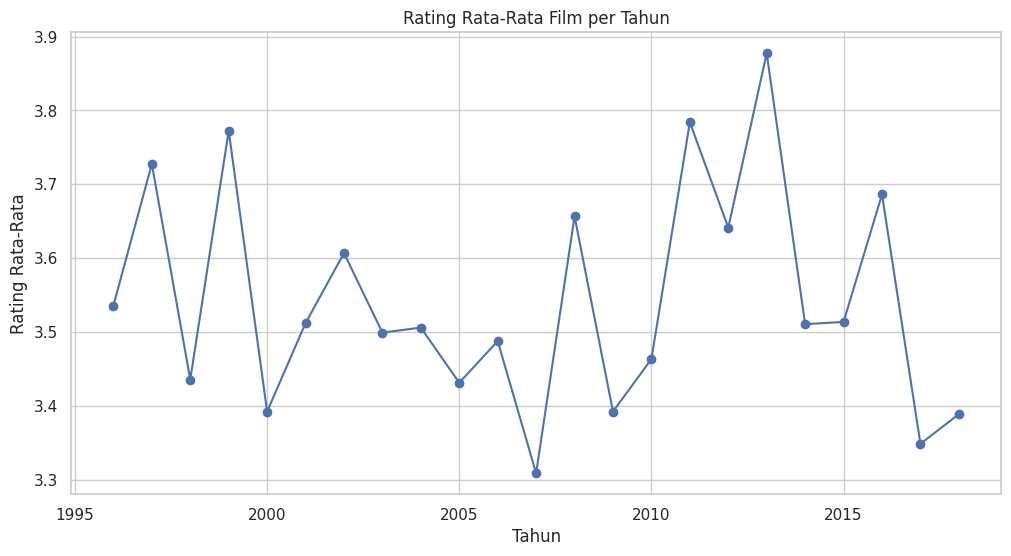

year
2009    3.392496
2010    3.463494
2011    3.784024
2012    3.641323
2013    3.877404
2014    3.510771
2015    3.513830
2016    3.686334
2017    3.348805
2018    3.389062
Name: rating, dtype: float64

In [18]:
from datetime import datetime

# Mengonversi timestamp ke datetime
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

# Mengekstrak tahun dari timestamp
ratings['year'] = ratings['timestamp'].dt.year

# Menghitung rating rata-rata per tahun
average_rating_per_year = ratings.groupby('year')['rating'].mean()

# Visualisasi rating rata-rata sepanjang waktu
plt.figure(figsize=(12, 6))
average_rating_per_year.plot(kind='line', marker='o')
plt.title('Rating Rata-Rata Film per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rating Rata-Rata')
plt.grid(True)
plt.show()

average_rating_per_year.tail(10)


Visualisasi rating rata-rata film per tahun menunjukkan:

- Variasi Rating Rata-Rata: Terdapat fluktuasi dalam rating rata-rata dari tahun ke tahun, dengan beberapa tahun menunjukkan peningkatan rating rata-rata, sementara tahun lainnya menunjukkan penurunan.
- Tren Terkini: Dalam dekade terakhir, rating rata-rata cenderung stabil dengan sedikit variasi dari tahun ke tahun. Tahun 2013 menonjol dengan rating rata-rata yang cukup tinggi dibandingkan dengan tahun-tahun sekitarnya.
- Stabilitas: Meskipun terdapat variasi tahunan, rating rata-rata secara keseluruhan tetap berada dalam rentang yang relatif stabil, menunjukkan bahwa tidak ada perubahan drastis dalam cara pengguna menilai film sepanjang waktu.

Analisis ini menunjukkan bahwa, meskipun terdapat variasi dari waktu ke waktu, tidak ada tren jelas peningkatan atau penurunan dalam rating rata-rata yang diberikan pengguna secara umum.

## Pengaruh Tahun Rilis terhadap Rating
Kita akan menganalisis apakah film yang lebih baru cenderung mendapatkan rating yang lebih tinggi atau lebih rendah dibandingkan dengan film yang lebih lama, dengan menghubungkan tahun rilis film dengan rating rata-rata yang diterima.

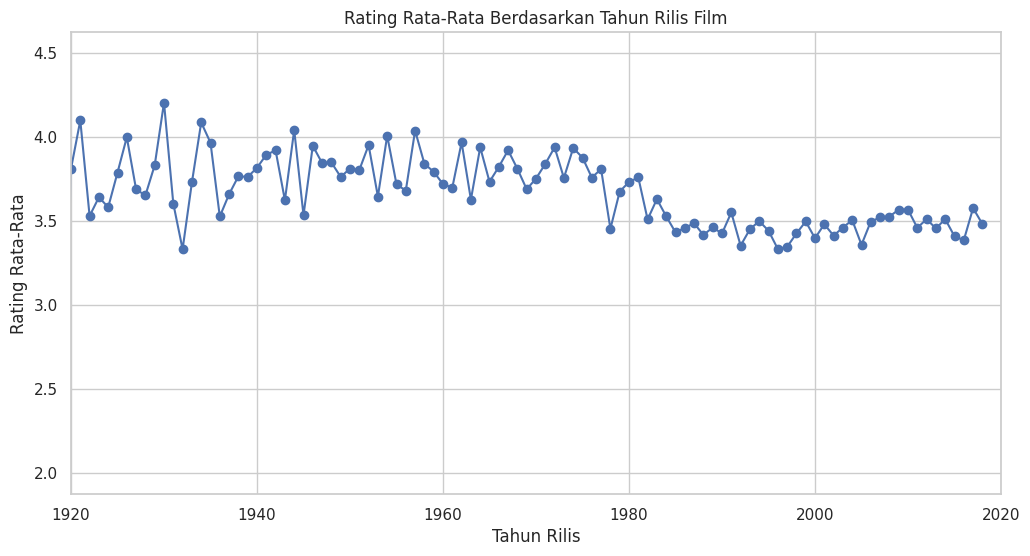

release_year
2009.0    3.568966
2010.0    3.569096
2011.0    3.460764
2012.0    3.512626
2013.0    3.457119
2014.0    3.512879
2015.0    3.410386
2016.0    3.387261
2017.0    3.578091
2018.0    3.483516
Name: rating, dtype: float64

In [19]:
# Menghitung rating rata-rata per film dengan menggabungkan rating dan movies DataFrame
rating_per_film_with_year = pd.merge(ratings, movies, on='movieId')

# Mengekstrak tahun dari judul film untuk setiap rating
rating_per_film_with_year['release_year'] = rating_per_film_with_year['title'].str.extract(r'\((\d{4})\)').astype(float)

# Menghitung rating rata-rata per tahun rilis film
average_rating_per_release_year = rating_per_film_with_year.groupby('release_year')['rating'].mean()

# Visualisasi rating rata-rata berdasarkan tahun rilis film
plt.figure(figsize=(12, 6))
average_rating_per_release_year.plot(kind='line', marker='o')
plt.title('Rating Rata-Rata Berdasarkan Tahun Rilis Film')
plt.xlabel('Tahun Rilis')
plt.ylabel('Rating Rata-Rata')
plt.xlim(1920, 2020)  # Memfokuskan plot pada rentang tahun tertentu
plt.grid(True)
plt.show()

average_rating_per_release_year.tail(10)


Visualisasi rating rata-rata berdasarkan tahun rilis film menunjukkan:

- Fluktuasi Rating: Terdapat variasi dalam rating rata-rata yang diberikan kepada film tergantung pada tahun rilisnya. Ini menunjukkan bahwa preferensi penonton dan kualitas film dapat bervariasi dari tahun ke tahun.
- Tren Terkini: Dalam dekade terakhir (2009-2018), rating rata-rata cenderung stabil dengan sedikit variasi antar tahun. Beberapa tahun, seperti 2017, menonjol dengan rating rata-rata yang relatif tinggi.
- Stabilitas Jangka Panjang: Ketika dilihat dalam jangka waktu yang lebih panjang, tidak ada tren jelas peningkatan atau penurunan dalam rating rata-rata berdasarkan tahun rilis. Rating rata-rata film tampaknya cukup stabil, meskipun terdapat fluktuasi dari tahun ke tahun.

Analisis ini menunjukkan bahwa tidak ada bukti kuat bahwa film yang lebih baru secara sistematis mendapatkan rating yang lebih tinggi atau lebih rendah daripada film yang lebih tua, mengindikasikan bahwa kualitas persepsi terhadap film oleh penonton tidak secara langsung terkait dengan tahun rilisnya.

# Data Preparation

## Menggabungkan Data Movies dengan Genre dan Tags

In [20]:
# Menggabungkan semua tag menjadi satu string per movieId
tags_aggregated = tags.groupby('movieId')['tag'].apply(lambda x: '|'.join(x)).reset_index()

# Menggabungkan movies_df dengan tags_aggregated berdasarkan movieId
movies_with_tags = pd.merge(movies, tags_aggregated, on='movieId', how='left')

# Ganti nilai NaN dengan string kosong pada kolom 'tag'
movies_with_tags['tag'].fillna('', inplace=True)

movies_with_tags.head()

,movieId,title,genres,Tahun,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,pixar|pixar|fun
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,fantasy|magic board game|Robin Williams|game
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,moldy|old
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,
4,5,Father of the Bride Part II (1995),Comedy,1995,pregnancy|remake


## Persiapan Data untuk Pemodelan

In [21]:
# Menggabungkan semua tag untuk setiap movieId
tags_combined = tags.groupby('movieId')['tag'].apply(lambda x: '|'.join(x)).reset_index()

# Menggabungkan tags_combined dengan dataframe movies
movies_with_tags = pd.merge(movies, tags_combined, on='movieId', how='left')

# Ganti nilai NaN dengan string kosong pada kolom 'tag'
movies_with_tags['tag'].fillna('', inplace=True)

# Membuat kolom 'combined_features' yang menggabungkan genre dan tag
movies_with_tags['combined_features'] = movies_with_tags['genres'] + '|' + movies_with_tags['tag']

movies_with_tags.head()


,movieId,title,genres,Tahun,tag,combined_features
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,pixar|pixar|fun,Adventure|Animation|Children|Comedy|Fantasy|pi...
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,fantasy|magic board game|Robin Williams|game,Adventure|Children|Fantasy|fantasy|magic board...
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,moldy|old,Comedy|Romance|moldy|old
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,,Comedy|Drama|Romance|
4,5,Father of the Bride Part II (1995),Comedy,1995,pregnancy|remake,Comedy|pregnancy|remake


Sekarang dataset siap untuk digunakan dalam pembuatan model rekomendasi berbasis konten, kolom 'combined_features' akan menjadi kunci untuk menghitung kesamaan antar film

# Mengembangkan Model Content Based Filtering

Dengan dataset yang telah disiapkan, langkah berikutnya adalah mengembangkan model sistem rekomendasi. Kita akan menggunakan teknik content based filtering untuk merekomendasikan film berdasarkan kesamaan konten.

Untuk melakukan ini, kita akan:
1. Mengonversi combined_features menjadi matriks vektor dengan menggunakan TF-IDF Vectorizer.
2. Menghitung skor kesamaan antar film dengan menggunakan cosine similarity.
3. Mengembangkan fungsi yang menerima judul film sebagai input dan mengembalikan rekomendasi film serupa.

## TF-IDF Vectorizer

Untuk mengembangkan model sistem rekomendasi berbasis konten, langkah pertama adalah mengubah teks dalam combined_features menjadi suatu bentuk numerik yang dapat diproses oleh algoritma.

Kita akan menggunakan TF-IDF Vectorizer untuk tujuan ini.

In [22]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import numpy as np

# Menggunakan TF-IDF Vectorizer untuk mengonversi teks kombinasi genre dan tag menjadi matriks fitur
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_with_tags['combined_features'])
tfidf_vectorizer.get_feature_names_out()

array(['06', '1900s', '1920s', ..., 'zombie', 'zombies', 'zooey'],
      dtype=object)

## Cosine Similarity

Menghitung skor kesamaan antar film dengan menggunakan cosine similarity.

In [23]:
# Menghitung skor kesamaan cosine antar film
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

[[1.         0.08807678 0.01349185 ... 0.         0.15084122 0.09576779]
 [0.08807678 1.         0.         ... 0.         0.         0.        ]
 [0.01349185 0.         1.         ... 0.         0.         0.14088088]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.15084122 0.         0.         ... 0.         1.         0.        ]
 [0.09576779 0.         0.14088088 ... 0.         0.         1.        ]]


## Fungsi Model Content Based Filtering

Membuat fungsi yang menerima judul film sebagai input dan mengembalikan rekomendasi film serupa.

In [24]:
from IPython.display import display, Markdown

# Fungsi untuk mendapatkan rekomendasi film berdasarkan judul film
def create_recommendation_table(random_movie_title, movies_with_tags, cosine_sim):
    # Mendapatkan indeks film yang sesuai dengan judul
    idx = movies_with_tags.index[movies_with_tags['title'] == random_movie_title].tolist()[0]

    # Mendapatkan skor kesamaan untuk semua film dengan film input
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Mengurutkan film berdasarkan skor kesamaan
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Mendapatkan skor untuk 10 film teratas dan diri sendiri
    sim_scores = sim_scores[1:11]

    # Mendapatkan indeks film
    movie_indices = [i[0] for i in sim_scores]

    # Mendapatkan skor kesamaan
    similarity_scores = [i[1] for i in sim_scores]

    # Menyusun informasi ke dalam DataFrame
    recommendation_data = movies_with_tags.loc[movie_indices]
    recommendation_data['similarity_score'] = similarity_scores

    # Menambahkan kolom tahun dari judul film
    recommendation_data['year'] = recommendation_data['title'].str.extract(r'\((\d{4})\)')

    # Menyaring kolom yang relevan
    recommendation_table = recommendation_data[['title', 'year', 'genres', 'tag', 'similarity_score']]

    return recommendation_table

Membuat fungsi untuk menghitung precision.

In [25]:
def calculate_precision_for_movie(random_movie_title, top_n_recommendations=10):
    # Mendapatkan indeks film yang sesuai dengan movieId
    idx = movies_with_tags.index[movies_with_tags['title'] == random_movie_title].tolist()[0]


    # Mendapatkan skor kesamaan untuk semua film dengan film input
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Mengurutkan film berdasarkan skor kesamaan
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Mendapatkan skor untuk top_n_recommendations film teratas (mengabaikan diri sendiri)
    sim_scores = sim_scores[1:top_n_recommendations + 1]

    # Mendapatkan indeks film
    movie_indices = [i[0] for i in sim_scores]

    # Menghitung relevansi berdasarkan genre yang sama
    target_movie_genres = set(movies_with_tags.loc[movies_with_tags['title'] == random_movie_title, 'genres'].iloc[0].split('|'))
    recommended_movies_genres = movies_with_tags.loc[movie_indices, 'genres'].apply(lambda x: set(x.split('|')))
    relevancy_count = recommended_movies_genres.apply(lambda x: len(target_movie_genres.intersection(x)) > 0).sum()

    # Menghitung precision
    precision = relevancy_count / top_n_recommendations

    return precision

## Mendapatkan Rekomendasi

Menjalankan fungsi yang menerima judul film acak sebagai input dan mengembalikan rekomendasi film serupa.

In [26]:
# Memilih film acak dari dataset
random_movie_title = movies_with_tags['title'].sample().iloc[0]

# Mendapatkan informasi genre dan tag untuk random_movie_title
selected_movie_info = movies_with_tags.loc[movies_with_tags['title'] == random_movie_title, ['genres', 'tag']].iloc[0]
selected_movie_genre = selected_movie_info['genres']
selected_movie_tag = selected_movie_info['tag']

# Menampilkan judul, genre, dan tag dari film yang dipilih
display(Markdown(f"### Judul film: {random_movie_title}"))
display(Markdown(f"- **Genre**: {selected_movie_genre}"))
display(Markdown(f"- **Tag**: {selected_movie_tag}"))

recommendation_table = create_recommendation_table(random_movie_title, movies_with_tags, cosine_sim)

# Tampilkan judul film yang dipilih
display(Markdown(f"- **Judul film**: {random_movie_title}"))

# Menyiapkan tabel hasil rekomendasi
# Ambil kolom yang relevan dari 'recommendation_table'
result_columns = ['title', 'year', 'genres', 'tag', 'similarity_score']
recommendation_result = recommendation_table[result_columns]

# Menghitung precision
precision_recommendation_result = calculate_precision_for_movie(random_movie_title)

# Tampilkan tabel hasil rekomendasi
display(Markdown("### Tabel hasil rekomendasi:"))
display(recommendation_result)

# Menampilkan precision
display(Markdown(f"### Nilai precision: {precision_recommendation_result}"))

### Judul film: Cocoanuts, The (1929)

- **Genre**: Comedy|Musical

- **Tag**: 

- **Judul film**: Cocoanuts, The (1929)

### Tabel hasil rekomendasi:

,title,year,genres,tag,similarity_score
716,"Band Wagon, The (1953)",1953,Comedy|Musical,,1.0
823,"Great Race, The (1965)",1965,Comedy|Musical,,1.0
1712,History of the World: Part I (1981),1981,Comedy|Musical,,1.0
2217,Help! (1965),1965,Comedy|Musical,,1.0
2309,Holiday Inn (1942),1942,Comedy|Musical,,1.0
2688,Anchors Aweigh (1945),1945,Comedy|Musical,,1.0
3251,Beach Blanket Bingo (1965),1965,Comedy|Musical,,1.0
3535,Can't Stop the Music (1980),1980,Comedy|Musical,,1.0
3947,À nous la liberté (Freedom for Us) (1931),1931,Comedy|Musical,,1.0
4183,Girls! Girls! Girls! (1962),1962,Comedy|Musical,,1.0


### Nilai precision: 1.0

# Mengembangkan Model Collaborative Filtering

## Persiapan Data

Dalam sistem rekomendasi, sering kali lebih mudah untuk bekerja dengan indeks yang berurutan daripada dengan ID yang asli karena dapat mengurangi kompleksitas dan ukuran memori yang diperlukan. Kita melakukan ini dengan mengonversi userId dan movieId menjadi tipe data kategori dan kemudian menggunakan .cat.codes untuk mengubahnya menjadi kode kategori yang berurutan:

In [27]:
# Mengubah userId dan movieId menjadi kategori yang berurutan
ratings['userId'] = ratings['userId'].astype('category').cat.codes
ratings['movieId'] = ratings['movieId'].astype('category').cat.codes

Menggunakan .nunique() untuk mendapatkan jumlah pengguna dan film, memberikan kita jumlah elemen unik dalam setiap kolom, yang berguna untuk memahami dimensi data kita.

In [28]:
# Mendapatkan jumlah pengguna dan film
num_users = ratings['userId'].nunique()
num_movies = ratings['movieId'].nunique()
num_users, num_movies

(610, 9724)

## Membagi Data Untuk Training dan Validasi

Sebelum melatih model, kita harus membagi data kita menjadi set latih dan validasi. Pembagian ini penting untuk dapat melatih model pada satu subset data dan mengujinya pada subset lain untuk memastikan bahwa model kita dapat memprediksi rating film dengan akurat pada data yang belum pernah dilihatnya sebelumnya. Kita menggunakan train_test_split dari pustaka sklearn.model_selection untuk melakukan ini.

In [29]:
from sklearn.model_selection import train_test_split

# Membuat dataset untuk model
X = ratings[['userId', 'movieId']].values
y = ratings['rating'].values

# Membagi data menjadi set latih dan validasi
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


- X merupakan matriks fitur yang berisi userId dan movieId.
- y adalah target yang kita coba prediksi, dalam hal ini rating.
- test_size=0.2 menunjukkan bahwa 20% dari data akan digunakan untuk set validasi, sementara sisanya untuk latihan.
- random_state menetapkan seed untuk pembagian acak, memastikan bahwa pembagian ini konsisten jika kode dijalankan berulang kali.

## Membuat Model

Membuat model sistem rekomendasi film dengan menggunakan TensorFlow dan Keras. Fungsi RecommenderNet dari Keras mendefinisikan model untuk memprediksi rating film berdasarkan interaksi antara pengguna dan film.

In [30]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate, Dropout
from tensorflow.keras.regularizers import l2

def RecommenderNet(num_users, num_movies, embedding_size):
    # Input layers
    user_input = Input(shape=(1,), name='user_input')
    movie_input = Input(shape=(1,), name='movie_input')

    # Embedding layers dengan regularisasi
    user_embedding = Embedding(num_users, embedding_size, name='user_embedding', embeddings_regularizer=l2(0.01))(user_input)
    movie_embedding = Embedding(num_movies, embedding_size, name='movie_embedding', embeddings_regularizer=l2(0.01))(movie_input)

    # Flatten the embeddings
    user_vector = Flatten(name='flatten_users')(user_embedding)
    movie_vector = Flatten(name='flatten_movies')(movie_embedding)

    # Concatenate user and movie vectors
    concatenated = Concatenate()([user_vector, movie_vector])

    # Dense layer dengan dropout
    dense = Dense(128, activation='relu')(concatenated)
    dropout = Dropout(0.5)(dense)
    output = Dense(1)(dropout)

    model = Model(inputs=[user_input, movie_input], outputs=output)

    model.compile(loss='mean_squared_error', optimizer='adam')

    return model

# Contoh membuat model dengan modifikasi
model = RecommenderNet(num_users, num_movies, 50)


## Proses Training Data

Memulai proses pelatihan model rekomendasi dengan TensorFlow dan Keras, epochs=10 menentukan bahwa seluruh dataset akan dilewati sebanyak 10 kali selama proses pelatihan. Setiap epoch memungkinkan model untuk belajar dari kesalahan prediksi pada iterasi sebelumnya.

In [31]:
history = model.fit([X_train[:, 0], X_train[:, 1]], y_train, epochs=10, validation_data=([X_val[:, 0], X_val[:, 1]], y_val))


Epoch 1/10
2521/2521 [==============================] - 27s 10ms/step - loss: 1.5353 - val_loss: 1.0034
Epoch 2/10
2521/2521 [==============================] - 24s 10ms/step - loss: 1.0723 - val_loss: 0.9434
Epoch 3/10
2521/2521 [==============================] - 23s 9ms/step - loss: 0.9982 - val_loss: 0.9315
Epoch 4/10
2521/2521 [==============================] - 24s 9ms/step - loss: 0.9638 - val_loss: 0.9314
Epoch 5/10
2521/2521 [==============================] - 25s 10ms/step - loss: 0.9329 - val_loss: 0.9159
Epoch 6/10
2521/2521 [==============================] - 24s 9ms/step - loss: 0.9172 - val_loss: 0.9153
Epoch 7/10
2521/2521 [==============================] - 23s 9ms/step - loss: 0.9043 - val_loss: 0.9086
Epoch 8/10
2521/2521 [==============================] - 23s 9ms/step - loss: 0.8914 - val_loss: 0.9074
Epoch 9/10
2521/2521 [==============================] - 23s 9ms/step - loss: 0.8904 - val_loss: 0.9031
Epoch 10/10
2521/2521 [==============================] - 22s 9ms/step 

## Visualisasi Metrik

Visualisasi proses pembelajaran model rekomendasi dengan menampilkan perubahan nilai loss selama pelatihan dan validasi. Visualisasi ini sangat penting untuk memahami bagaimana model berkembang seiring waktu dan untuk mengidentifikasi apakah model tersebut mengalami overfitting atau underfitting.

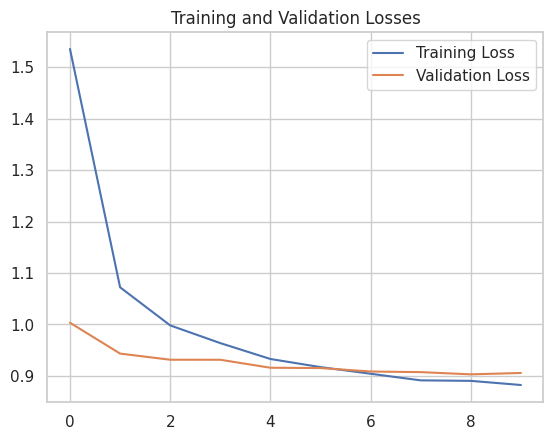

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

Menyiapkan pemetaan ulang untuk user dan movie

In [33]:
# Menyiapkan pemetaan kembali untuk user dan movie
user_ids = ratings['userId'].unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

movie_ids = ratings['movieId'].unique().tolist()
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

Membuat fungsi make_recommendation dengan tujuan untuk menghasilkan rekomendasi film bagi seorang pengguna berdasarkan prediksi dari model sebelumnya

In [34]:
import numpy as np

def make_recommendation(model, user_id, num_recommendations=10):
    # Periksa apakah user_id perlu di-encode
    # Jika perlu, gunakan struktur data yang sesuai untuk mencari kode pengguna
    user_encoded = user_to_user_encoded.get(user_id)
    if user_encoded is None:
        raise ValueError("UserID not found in encoded user IDs.")

    # Menyiapkan movie_ids yang belum ditonton oleh user
    movie_ids = np.setdiff1d(movies['movieId'].unique(), ratings[ratings['userId'] == user_id]['movieId'])

    # Encoding movie_ids
    movie_ids_encoded = [movie_to_movie_encoded.get(x) for x in movie_ids if movie_to_movie_encoded.get(x) is not None]

    user_encoded_array = np.array([user_encoded] * len(movie_ids_encoded))
    movie_ids_encoded_array = np.array(movie_ids_encoded)

    # Melakukan prediksi
    predictions = model.predict([user_encoded_array, movie_ids_encoded_array])

    # Mendapatkan rekomendasi berdasarkan prediksi rating tertinggi
    top_ratings_indices = predictions.flatten().argsort()[-num_recommendations:][::-1]
    recommended_movie_ids_encoded = [movie_ids_encoded_array[x] for x in top_ratings_indices]

    # Mendapatkan movieId asli dari rekomendasi
    recommended_movie_ids = [movie_encoded_to_movie.get(movie_encoded) for movie_encoded in recommended_movie_ids_encoded]

    return movies[movies['movieId'].isin(recommended_movie_ids)]


## Mendapatkan Rekomendasi

Menampilkan rekomendasi film bagi pengguna acak dalam dataset dengan memanggil fungsi make_recommendation

In [35]:
import pandas as pd
from IPython.display import display, Markdown
import numpy as np
import random

# Memilih user ID acak dari dataset
random_user_id = random.choice(user_ids)

# Tampilkan 3 film teratas yang dinilai oleh user
top_rated_movies_by_user = ratings[ratings['userId'] == random_user_id].sort_values(by='rating', ascending=False).head(3)

# Gabungkan dengan dataframe movies untuk mendapatkan judul film
top_rated_movies_info = top_rated_movies_by_user.merge(movies, on='movieId', how='left')[['title', 'rating']]

# Generate rekomendasi untuk user ini
recommended_movies = make_recommendation(model, random_user_id, num_recommendations=5)

# Menampilkan hasil
display(Markdown(f"## User ID: {random_user_id}"))
display(Markdown(f"### 5 Film Teratas yang Dinilai oleh User:"))
display(top_rated_movies_info)

display(Markdown(f"### Daftar Film Rekomendasi:"))
display(recommended_movies[['title']])


169/169 [==============================] - 1s 5ms/step


## User ID: 179

### 5 Film Teratas yang Dinilai oleh User:

,title,rating
0,Don Juan DeMarco (1995),4.5
1,"Maltese Falcon, The (1941)",4.5
2,NaN,4.5


### Daftar Film Rekomendasi:

,title
255,"Perez Family, The (1995)"
532,"Last Supper, The (1995)"
585,Wallace & Gromit: The Best of Aardman Animatio...
2077,"Iron Giant, The (1999)"
2213,South Pacific (1958)
